In [1]:
from plotnine.data import txhousing
df = txhousing

#drop rows with NAN values 
df.dropna(inplace=True)

In [2]:
df.head()

,city,year,month,sales,volume,median,listings,inventory,date
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

try:
    data = df

    if data is not None:  
        selected_features = ['volume', 'median', 'listings', 'inventory']
        data['date'] = pd.to_datetime(data['date'])
        data['year'] = data['date'].dt.year
        data['month'] = data['date'].dt.month
        selected_features.extend(['year', 'month'])

        X = data[selected_features]
        y = data['sales']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(),
            'Gradient Boosting': GradientBoostingRegressor()
        }

        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, predictions)

            print(f"Model: {name}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")
            print(f"R-squared: {r2}")
            print("---------")
    else:
        print("Error: Data not loaded.")

except Exception as e:
    print(f"Error: {e}")


Model: Linear Regression
MSE: 17568.355583379234
RMSE: 132.54567357473135
R-squared: 0.985788228274936
---------
Model: Random Forest
MSE: 3172.304664446002
RMSE: 56.32321603429621
R-squared: 0.9974337911411518
---------
Model: Gradient Boosting
MSE: 4469.581239768421
RMSE: 66.85492681746366
R-squared: 0.9963843702966536
---------


These results suggest that Random Forest and Gradient Boosting models are fitting the data better than Linear Regression, with much lower errors and higher R-squared values, indicating a better overall fit and predictive capability.

In [7]:

for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"Model: {name}")
    
    ## comparing predicted sales with the actual sales from the test set
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    print(comparison.head(10))  # first 10 rows of actual vs predicted sales
    print("---------")


Model: Linear Regression
      Actual    Predicted
4748   227.0   243.181769
6274    43.0    69.837204
5477   659.0   646.749013
5179   150.0   204.806991
7431    21.0  -154.324772
2081  2862.0  2731.637765
7864   154.0   194.445513
7824    41.0    93.279597
940    162.0   191.000325
5922   679.0   738.320178
---------
Model: Random Forest
      Actual  Predicted
4748   227.0     241.22
6274    43.0      43.70
5477   659.0     683.95
5179   150.0     160.40
7431    21.0      32.27
2081  2862.0    2835.16
7864   154.0     152.99
7824    41.0      36.42
940    162.0     172.99
5922   679.0     725.54
---------
Model: Gradient Boosting
      Actual    Predicted
4748   227.0   233.225832
6274    43.0    52.276209
5477   659.0   638.843268
5179   150.0   163.337032
7431    21.0    30.515714
2081  2862.0  2920.914149
7864   154.0   143.563144
7824    41.0    43.974487
940    162.0   156.628040
5922   679.0   702.361518
---------


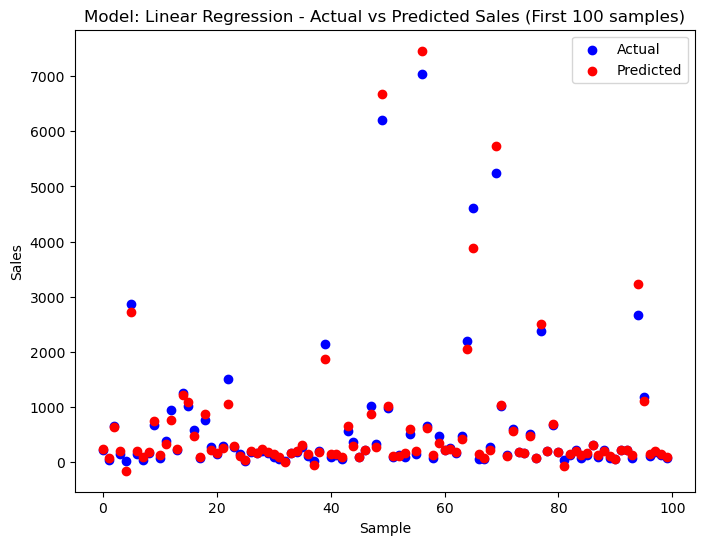

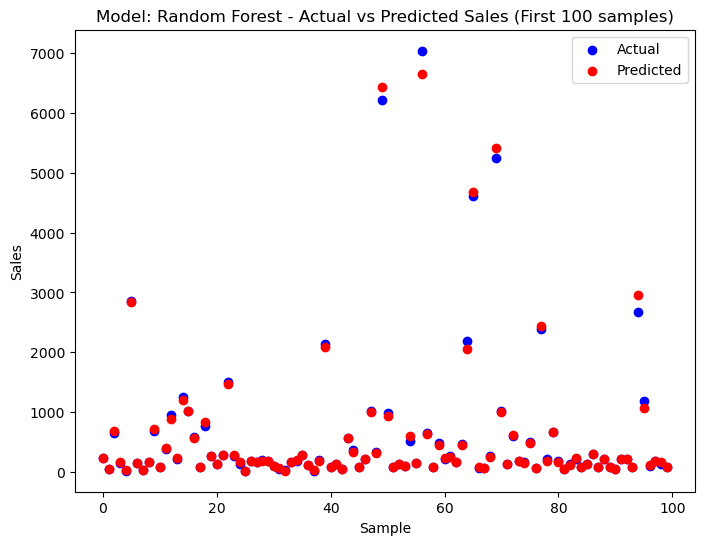

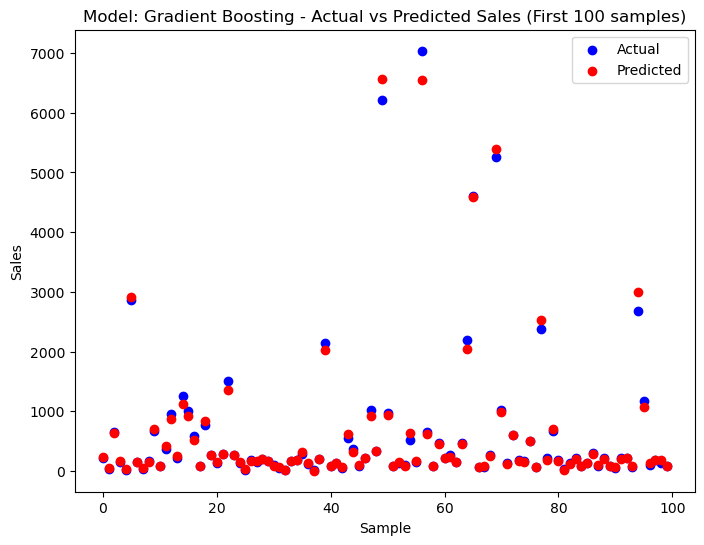

In [6]:
import matplotlib.pyplot as plt

## graphical comparison for the first 100 samples
for name, model in models.items():
    predictions = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(range(100), y_test[:100], color='blue', label='Actual')
    plt.scatter(range(100), predictions[:100], color='red', label='Predicted')
    plt.title(f"Model: {name} - Actual vs Predicted Sales (First 100 samples)")
    plt.xlabel('Sample')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [8]:
#from sklearn.coss_validation import train_test_split
from sklearn.model_selection import train_test_split

X = data[selected_features]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
reg.score(X_test, y_test)

0.9884138486432225

The variable we are predicting is called the criterion variable and is referred to as Y. 
The variable we are basing our predictions on is called the predictor variable and is referred to as X. 
When there is only one predictor variable, the prediction method is called Simple Regression and if multiple predictor variable are present then multiple regression. We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not.

I’ve made my train data as 80% and 20% of the data to be my test data , and randomized the splitting of data by using random_state. The prediction here is 98.84% accurate.

In [10]:
#gradient boosting
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators= 100, max_depth= 5, min_samples_split=2, learning_rate=0.1, loss = 'squared_error')
clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [11]:
clf.score(X_test, y_test)

0.997273854786003

In [15]:
## unique cities in the dataset
cities = df['city'].unique()
cities

array(['Abilene', 'Amarillo', 'Arlington', 'Austin', 'Bay Area',
       'Beaumont', 'Brazoria County', 'Brownsville',
       'Bryan-College Station', 'Collin County', 'Corpus Christi',
       'Dallas', 'Denton County', 'El Paso', 'Fort Bend', 'Fort Worth',
       'Galveston', 'Garland', 'Harlingen', 'Houston', 'Irving',
       'Kerrville', 'Killeen-Fort Hood', 'Laredo', 'Longview-Marshall',
       'Lubbock', 'Lufkin', 'McAllen', 'Midland', 'Montgomery County',
       'Nacogdoches', 'NE Tarrant County', 'Odessa', 'Paris',
       'Port Arthur', 'San Angelo', 'San Antonio', 'San Marcos',
       'Sherman-Denison', 'South Padre Island', 'Temple-Belton',
       'Texarkana', 'Tyler', 'Victoria', 'Waco', 'Wichita Falls'],
      dtype=object)

Exploring per city sale trend using linear regression and random forest models below:

In [21]:
## dictionary to store models for each city
city_models = {}

In [17]:

for city in cities:
    city_data = df[df['city'] == city]
    
    ## I have to extract features (X) and target variable (y) for the city
    X_city = city_data[['year', 'month', 'volume', 'median', 'listings', 'inventory']]
    y_city = city_data['sales']
    
    # Splitting into train and test :20|80
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)
    
    ## train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Storing model in dictionary
    city_models[city] = model
    
    # predictions on test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Print evaluation metrics for each city
    print(f"City: {city}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("---------")

City: Abilene
MSE: 81.38909863976939
RMSE: 9.021590693429257
R-squared: 0.9363088053695704
---------
City: Amarillo
MSE: 194.60526942010597
RMSE: 13.950099262016238
R-squared: 0.9126855285394752
---------
City: Arlington
MSE: 201.98742233661756
RMSE: 14.212227916010127
R-squared: 0.9796152996075225
---------
City: Austin
MSE: 6026.944012131159
RMSE: 77.63339495430532
R-squared: 0.9801437582291775
---------
City: Bay Area
MSE: 488.49948217603935
RMSE: 22.10202439090228
R-squared: 0.9698436277418792
---------
City: Beaumont
MSE: 112.1804373841349
RMSE: 10.591526678630183
R-squared: 0.9331206454302728
---------
City: Brazoria County
MSE: 34.71308987414918
RMSE: 5.891781553498838
R-squared: 0.9452029984519638
---------
City: Brownsville
MSE: 47.842053576270764
RMSE: 6.916795036450825
R-squared: 0.799455304543655
---------
City: Bryan-College Station
MSE: 229.26479605761995
RMSE: 15.141492530712418
R-squared: 0.9677845971831378
---------
City: Collin County
MSE: 1393.2728386980314
RMSE: 37.

In [19]:
df.groupby('city').count()

,year,month,sales,volume,median,listings,inventory,date
city,,,,,,,,
Abilene,186,186,186,186,186,186,186,186
Amarillo,182,182,182,182,182,182,182,182
Arlington,186,186,186,186,186,186,186,186
Austin,187,187,187,187,187,187,187,187
Bay Area,186,186,186,186,186,186,186,186
Beaumont,187,187,187,187,187,187,187,187
Brazoria County,129,129,129,129,129,129,129,129
Brownsville,82,82,82,82,82,82,82,82
Bryan-College Station,187,187,187,187,187,187,187,187


We can see that cities which have less data- the prediction is poor due to lack of data for training

In [22]:
#random forest model:
for city in cities:
    city_data = df[df['city'] == city]
    
    # Extract features (X) and target variable (y) for the city
    X_city = city_data[['year', 'month', 'volume', 'median', 'listings', 'inventory']]
    y_city = city_data['sales']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Store the trained model in the dictionary
    city_models[city] = model
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Print evaluation metrics for each city
    print(f"City: {city}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("---------")


City: Abilene
MSE: 80.39001315789471
RMSE: 8.966047800335145
R-squared: 0.9370906416221152
---------
City: Amarillo
MSE: 236.15651891891892
RMSE: 15.367384908269816
R-squared: 0.8940425318758995
---------
City: Arlington
MSE: 449.078665789474
RMSE: 21.191476253189016
R-squared: 0.9546786926192066
---------
City: Austin
MSE: 12334.353944736846
RMSE: 111.0601366140743
R-squared: 0.9593634993919598
---------
City: Bay Area
MSE: 685.8533500000002
RMSE: 26.188801996273146
R-squared: 0.95766044859465
---------
City: Beaumont
MSE: 97.74983684210528
RMSE: 9.886851715389753
R-squared: 0.9417238321605912
---------
City: Brazoria County
MSE: 57.024042307692326
RMSE: 7.551426508130257
R-squared: 0.9099836244500695
---------
City: Brownsville
MSE: 13.555347058823525
RMSE: 3.681758691009437
R-squared: 0.9431785898700394
---------
City: Bryan-College Station
MSE: 311.32878421052635
RMSE: 17.64451144720438
R-squared: 0.9562532828227784
---------
City: Collin County
MSE: 4379.088731578948
RMSE: 66.1746

In [25]:
max_year = txhousing['year'].max()
print(f"The maximum year in the data is: {max_year}")

The maximum year in the data is: 1970
